In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


# Gathering Data and Preprocessing:

In [ ]:
# Data comes from: https://www.sportsbookreviewsonline.com/scoresoddsarchives/nba/nbaoddsarchives.htm
# ^ for game results and odds 

# Need to download data to drive and then mount to that place in the drive
from google.colab import drive 
drive.mount('/content/drive', force_remount=True) 
drive_path="/content/drive/MyDrive/CS1470 Final Project/"

Mounted at /content/drive


In [ ]:
# Game files of form "nba odds 2010-2011.xlsx"

# Game data from seaason 2008-2009 to 2019-2020
game_files = []
years = []
for i in range(8, 20):
  years.append(f"{i:02}" + "-" + f"{i + 1:02}")
  game_files.append(drive_path + "nba odds 20" + f"{i:02}" + "-" + f"{(i + 1):02}" + ".xlsx")


In [ ]:
# Read in excel files by year, combine at the end 

# Creates data 
game_dfs = []
for f in range(len(game_files)):
  games_df = pd.read_excel(game_files[f])
  games_df['Team'] = games_df['Team'].str.replace(" ","")
  # Lists to generate new columns
  opponent = []
  opponent_win_loss = []
  opponent_odds = []
  year = []
  win_or_loss = []
  opponent_points_for = []
  for i in range(len(games_df)):
    year.append(years[f])
  
  for i in range(0, len(games_df), 2):
    # Skipping by two 
    # Example for adding opponent information:
    # Opponent for first team in matchup
    opponent.append(games_df['Team'].iloc[i + 1])
    # Opponent for second team in matchup
    opponent.append(games_df['Team'].iloc[i])
    opponent_odds.append(games_df['ML'].iloc[i + 1])
    opponent_odds.append(games_df['ML'].iloc[i])
    opponent_points_for.append(games_df['Final'].iloc[i + 1])
    opponent_points_for.append(games_df['Final'].iloc[i])

    # Need to determine who won or loss and assign that a value
    if games_df['Final'].iloc[i] > games_df['Final'].iloc[i + 1]:
      win_or_loss.append('W')
      win_or_loss.append('L')
    else:
      win_or_loss.append('L')
      win_or_loss.append('W')
  # Adding calculated columns:
  games_df['Opponent'] = opponent
  games_df['opponent_odds'] = opponent_odds
  games_df['Win_or_loss'] = win_or_loss
  games_df['Opponent_final'] = opponent_points_for
  
  
  # Need to sum up wins before each game in the season:
  teams = games_df['Team'].unique()
  total_wins = []
  total_losses = []
  games_played = []
  win_loss_perc = []

  # Dictionary of lists of dictionaries of lists 
  team_dict = dict()
  
  # Initialize dictionaries
  teams = games_df['Team'].unique()
  for key in teams:
    op_teams = []
    for team in teams:
      if key != team:
        op_teams.append(team)
    if key not in team_dict:
      team_dict[key] = [[0], [0], [0], [0], [0], [0], [0], 
                              dict.fromkeys(op_teams, [[0], [0], [0], [0]]), 
                                                       [0], [0], [0], [0]]

  # Lists:
  wins = [] #0
  losses = [] #1
  games_played = [] #2
  win_percent = [] #3
  points_for = [] #4
  points_against = [] #5
  point_diff = [] #6
  # Lists within dict
  head_to_head = [] #7, wins then losses then games played then percent win
  op_win_percent = [] #8
  op_points_for = [] #9
  op_points_against = [] #10
  op_point_diff = [] #11
  
  for i in range(len(games_df)):
    # Get current wins, losses, games played, win percent:
    key = games_df['Team'].iloc[i]
    # Ordering of list = wins, losses, games played, win percent, points for,
    # points against, point differential 
    # head to head win percent vs opponent, opponent win percent, opponent points for,
    # opponent points against, opponent point differential
    # Initialize op_team_dict with every team but current one:
    
    op_team = games_df['Opponent'].iloc[i]
     
    
    
    wins.append(team_dict[key][0][-1])
    losses.append(team_dict[key][1][-1])
    games_played.append(team_dict[key][2][-1])
    win_percent.append(team_dict[key][3][-1])
    if games_df['Win_or_loss'].iloc[i] == 'W':
      team_dict[key][0].append(team_dict[key][0][-1] + 1)
    else:
      team_dict[key][1].append(team_dict[key][1][-1] + 1)
    team_dict[key][2].append(team_dict[key][2][-1] + 1)
    team_dict[key][3].append(round(team_dict[key][0][-1] / team_dict[key][2][-1], 2))
    

    # Adds points for, points against, and point differential:
    points_for.append(team_dict[key][4][-1])
    points_against.append(team_dict[key][5][-1])
    point_diff.append(team_dict[key][4][-1] - team_dict[key][5][-1])
    team_dict[key][4].append(team_dict[key][4][-1] + games_df['Final'].iloc[i])
    team_dict[key][5].append(team_dict[key][5][-1] + games_df['Opponent_final'].iloc[i])
    team_dict[key][6].append(team_dict[key][4][-1] - team_dict[key][5][-1])
    

    # Adds head_to_head 
    
    if i % 2 == 0:
      if games_df['Win_or_loss'].iloc[i] == 'W':
        team_dict[key][7][op_team][0].append(team_dict[key][7][op_team][0][-1] + 1)
      else: 
        team_dict[key][7][op_team][1].append(team_dict[key][7][op_team][1][-1] + 1)
      team_dict[key][7][op_team][2].append(team_dict[key][7][op_team][2][-1] + 1)
      team_dict[key][7][op_team][3].append(round(team_dict[key][7][op_team][0][-1] 
                                                / team_dict[key][7][op_team][2][-1], 2))
    else:
      if games_df['Win_or_loss'].iloc[i] == 'W':
        team_dict[key][7][op_team][0].append(team_dict[key][7][op_team][0][-1] + 1)
      else: 
        team_dict[key][7][op_team][1].append(team_dict[key][7][op_team][1][-1] + 1)
      team_dict[key][7][op_team][2].append(team_dict[key][7][op_team][2][-1] + 1)
      team_dict[key][7][op_team][3].append(round(team_dict[key][7][op_team][0][-1] 
                                                / team_dict[key][7][op_team][2][-1], 2))
    
    head_to_head_current = []
    for x in range(4):
      head_to_head_current.append(team_dict[key][7][op_team][x][-1])
    head_to_head.append(head_to_head_current)
      
    # Adds points for, points against, and point differential:
    if i % 2 == 0: 
      team_dict[key][9].append(team_dict[op_team][4][-1])
      team_dict[key][10].append(team_dict[op_team][5][-1])
      team_dict[key][11].append(team_dict[key][9][-1] - team_dict[key][10][-1])
    else:
      team_dict[key][9].append(team_dict[op_team][4][-2])
      team_dict[key][10].append(team_dict[op_team][5][-2])
      team_dict[key][11].append(team_dict[key][9][-1] - team_dict[key][10][-1])
    
    # Adds wins, losses, games_played, win_percent:
    op_points_for.append(team_dict[key][9][-1])
    op_points_against.append(team_dict[key][10][-1])
    op_point_diff.append(team_dict[key][9][-1] - team_dict[key][10][-1])
    
  # Adding the new columns     
  games_df['Year'] = year
  games_df['Wins'] = wins
  games_df['Losses'] = losses
  games_df['Games_played'] = games_played
  games_df['Win_percent'] = win_percent

  op_games_played = []
  for i in range(0, len(games_df), 2):
    # Opponent win percent for first team in matchup
    op_win_percent.append(games_df['Win_percent'].iloc[i + 1])
    op_games_played.append(games_df['Games_played'].iloc[i + 1])
    # Opponent win percent for second team in matchup
    op_win_percent.append(games_df['Win_percent'].iloc[i])
    op_games_played.append(games_df['Games_played'].iloc[i])


  
  # Adding more columns
  games_df['Points_for'] = points_for
  games_df['Points_against'] = points_against
  games_df['Point_diff'] = point_diff
  #games_df['Head_to_head'] = head_to_head
  games_df['Op_games_played'] = op_games_played
  games_df['Op_win_percent'] = op_win_percent
  games_df['Op_points_for'] = op_points_for
  games_df['Op_points_against'] = op_points_against
  games_df['Op_point_diff'] = op_point_diff

  game_dfs.append(games_df)

game_dfs = pd.concat(game_dfs)

In [ ]:
# Drop irrelevant columns / ones that are in the wrong time frame:
game_dfs = game_dfs.drop('Date', 1)
game_dfs = game_dfs.drop('Rot', 1)
game_dfs = game_dfs.drop('1st', 1)
game_dfs = game_dfs.drop('2nd', 1)
game_dfs = game_dfs.drop('3rd', 1)
game_dfs = game_dfs.drop('4th', 1)
game_dfs = game_dfs.drop('Final', 1)
game_dfs = game_dfs.drop('Open', 1)
game_dfs = game_dfs.drop('Close', 1)
game_dfs = game_dfs.drop('2H', 1)
game_dfs = game_dfs.drop('Opponent_final', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a futur

In [ ]:
# Convert American odds to percent odds 

def convert_to_prob(odds):
  prob = 0
  if(odds>0):
    prob = 100/(100+odds)
  elif(odds<0):
    prob = (-odds)/(100-odds)

  return prob


# Drop where games played = 0 (measured by no points) because it is worthless for testing: 
training_df = game_dfs[(game_dfs['Points_for'] > 0) & (game_dfs['Op_points_for'] > 0)]

training_df_2 = training_df.copy(deep=True)

# Generate stats for opponents 
odds = training_df['ML'].map(convert_to_prob)
op_odds = training_df['opponent_odds'].map(convert_to_prob)
training_df['Odds'] = odds
training_df['Op_odds'] = op_odds
training_df = training_df.drop('ML', 1)
training_df = training_df.drop('opponent_odds', 1)

new_points_for = []
new_points_against = []
new_point_diff = []

new_op_points_for = []
new_op_points_against = []
new_op_point_diff = []

for i in range(len(training_df)):
  # Standardizing to per game played:
  new_points_for.append(training_df['Points_for'].iloc[i] / training_df['Games_played'].iloc[i])
  new_points_against.append(training_df['Points_against'].iloc[i] / training_df['Games_played'].iloc[i])
  new_point_diff.append(training_df['Point_diff'].iloc[i] / training_df['Games_played'].iloc[i])

  # Standardizing to per game played for op information:
  new_op_points_for.append(training_df['Op_points_for'].iloc[i] / training_df['Op_games_played'].iloc[i])
  new_op_points_against.append(training_df['Op_points_against'].iloc[i] / training_df['Op_games_played'].iloc[i])
  new_op_point_diff.append(training_df['Op_point_diff'].iloc[i] / training_df['Op_games_played'].iloc[i])

training_df = training_df.drop('Points_for', 1)
training_df = training_df.drop('Points_against', 1)
training_df = training_df.drop('Point_diff', 1)
training_df = training_df.drop('Op_points_for', 1)
training_df = training_df.drop('Op_points_against', 1)
training_df = training_df.drop('Op_point_diff', 1)

training_df['Points_for'] = new_points_for
training_df['Points_against'] = new_points_against
training_df['Points_diff'] = new_point_diff
training_df['Op_points_for'] = new_op_points_for
training_df['Op_points_against'] = new_op_points_against
training_df['Op_point_diff'] = new_op_point_diff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: In a future versio

In [ ]:
# One hot encode every categorical column:
training_df = pd.get_dummies(training_df, columns = ['Team'], prefix='Team')
training_df = pd.get_dummies(training_df, columns = ['Opponent'], prefix='Opponent')
training_df = pd.get_dummies(training_df, columns = ['VH'], prefix='VH')
training_df = pd.get_dummies(training_df, columns = ['Year'], prefix='Year')

win_loss_map = {'W': 1, 'L': 0}
training_df['Win_or_loss'] = training_df['Win_or_loss'].map(win_loss_map)

# Drop odds columns to help with decorrelation 
# Commenting out as decorrelation is done below
odds_df = training_df.copy(deep=True)
# training_df = training_df.drop('Odds', 1)
# training_df = training_df.drop('Op_odds', 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into inputs and labels:
columns = list(training_df.columns)
input_cols = []

for col in columns:
  if col != 'Win_or_loss':
    input_cols.append(col)

inputs = (training_df[input_cols])
labels = training_df[['Win_or_loss']]

# Train / test split 
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=30)



x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)


# Split into inputs and labels:
columns = list(odds_df.columns)
input_cols = []

for col in columns:
  if col != 'Win_or_loss':
    input_cols.append(col)

inputs2 = (odds_df[input_cols])
labels = odds_df[['Win_or_loss']]

# Train / test split 
x_train2, x_test2, y_train2, y_test2 = train_test_split(inputs2, labels, test_size=0.2, random_state=30)


train_odds = tf.concat([x_train2[['Odds']], x_train2[['Op_odds']]], axis=1)
test_odds = tf.concat([x_test2[['Odds']], x_test2[['Op_odds']]], axis=1)\

x_train2 = np.asarray(x_train2).astype(np.float32)
x_test2 = np.asarray(x_test2).astype(np.float32)
y_train2 = np.asarray(y_train2).astype(np.float32)
y_test = np.asarray(y_test2).astype(np.float32)



train_odds = np.asarray(train_odds).astype(np.float32)
test_odds = np.asarray(test_odds).astype(np.float32)

# Game Win or Loss Model:

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten

game_model = tf.keras.Sequential()
game_model.add(Flatten())
game_model.add(Dense(64, activation='relu'))
game_model.add(Dropout(0.4))
game_model.add(Dense(32, activation='relu'))
game_model.add(Dropout(0.4))
game_model.add(Dense(16, activation='relu'))
game_model.add(Dropout(0.4))
game_model.add(Dense(1, activation='sigmoid'))

game_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0005), metrics=["accuracy"])
game_model.fit(x_train, y_train, batch_size=16, validation_data=(x_test, y_test), verbose=1,epochs=15)

Epoch 1/15
1515/1515 [==============================] - 5s 3ms/step - loss: 1.2590 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5081
Epoch 2/15
1515/1515 [==============================] - 4s 3ms/step - loss: 0.7030 - accuracy: 0.5080 - val_loss: 0.6930 - val_accuracy: 0.5081
Epoch 3/15
1515/1515 [==============================] - 4s 2ms/step - loss: 0.6955 - accuracy: 0.5158 - val_loss: 0.6918 - val_accuracy: 0.5490
Epoch 4/15
1515/1515 [==============================] - 4s 3ms/step - loss: 0.6863 - accuracy: 0.5442 - val_loss: 0.6618 - val_accuracy: 0.6476
Epoch 5/15
1515/1515 [==============================] - 4s 3ms/step - loss: 0.6723 - accuracy: 0.5736 - val_loss: 0.6579 - val_accuracy: 0.6448
Epoch 6/15
1515/1515 [==============================] - 4s 2ms/step - loss: 0.6586 - accuracy: 0.6086 - val_loss: 0.6435 - val_accuracy: 0.6666
Epoch 7/15
1515/1515 [==============================] - 4s 3ms/step - loss: 0.6525 - accuracy: 0.6250 - val_loss: 0.6446 - val_accuracy:

In [ ]:
def convert_to_prob(odds):
  prob = 0
  if(odds>0):
    prob = 100/(100+odds)
  elif(odds<0):
    prob = (-odds)/(100-odds)

  return prob

# Split into inputs and labels:
columns = list(training_df.columns)
input_cols = []

for col in columns:
  if col != 'Odds':
    input_cols.append(col)


# Generate profit graphs 
profit = []
for i in range(len(odds_df)):
  there_output = odds_df['Odds'].iloc[i]
  if odds_df['Win_or_loss'].iloc[i] == 1:
    payout = (1 / there_output)
    profit.append(payout)
  else:
    profit.append(0)

# Unnecessary 
# training_df['Profit'] = profit
# training_df = training_df.drop('Profit', 1)

In [ ]:
# Betting strategy:

# If our prediction differs from the odds by a large margin, place a bet

# Split into inputs, odds, and win or loss:
columns = list(odds_df.columns)
input_cols_odds = []

# for col in columns:
#   if col != 'Odds' and col != 'Win_or_loss' and col != 'ML':
#     input_cols_odds.append(col)

for col in columns:
  if col != 'Win_or_loss':
    input_cols_odds.append(col)


inputs = (odds_df[input_cols_odds])

odds = odds_df[['Odds']]
labels = odds_df[['Win_or_loss']]

outputs = list(game_model(np.asarray(inputs).astype(np.float32)))


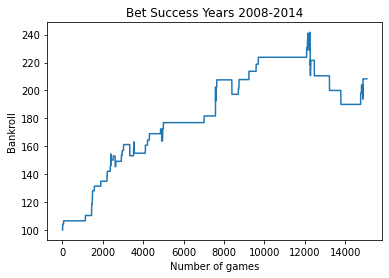

Starting bankroll = 100, ending bankroll = 208.29, for profit of 108.29%


In [ ]:
bank_roll = 100
graph_bank = []
x_ticks = []

our_accuracy = []
there_accuracy = []

for i in range(len(odds_df)):
  payout = 0
  our_output = outputs[i].numpy()[0]
  there_output = odds_df["Odds"].iloc[i]
  
  if our_output > .65 and there_output < our_output:
    bet = .05 * bank_roll
    bank_roll = bank_roll - bet
    if labels['Win_or_loss'].iloc[i] == 1:
      payout = bet * (1 / there_output)
  if inputs['Year_14-15'].iloc[i] == 1:
    break
  bank_roll += payout
  graph_bank.append(bank_roll)
  x_ticks.append(i)


import matplotlib.pyplot as plt

plt.plot(x_ticks , graph_bank)
plt.title('Bet Success Years 2008-2014')
plt.xlabel('Number of games')
plt.ylabel('Bankroll')
plt.show()

print("Starting bankroll = " + str(graph_bank[0]) + ", ending bankroll = " + "{:.2f}".format(graph_bank[-1]) + ", for profit of " + "{:.2%}".format(((graph_bank[-1] - graph_bank[0]) / graph_bank[0])))

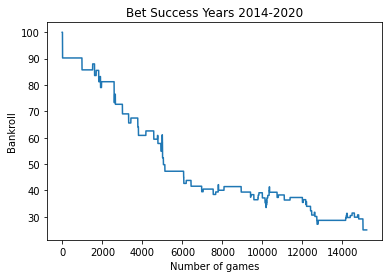

Starting bankroll = 100, ending bankroll = 25.05, for profit of -74.95%


In [ ]:
bank_roll = 100
graph_bank = []
x_ticks = []

our_accuracy = []
there_accuracy = []

x = 0
for i in range(len(odds_df)):
  if inputs['Year_14-15'].iloc[i] == 1:
    x = i
    break
for i in range(x, len(odds_df)):
  payout = 0
  our_output = outputs[i].numpy()[0]
  there_output = odds["Odds"].iloc[i]
  
  if our_output > .65 and there_output < our_output:
    bet = .05 * bank_roll
    bank_roll = bank_roll - bet
    if labels['Win_or_loss'].iloc[i] == 1:
      payout = bet * (1 / there_output)
  
  bank_roll += payout
  graph_bank.append(bank_roll)
  x_ticks.append(i - x)


import matplotlib.pyplot as plt

plt.plot(x_ticks , graph_bank)
plt.title('Bet Success Years 2014-2020')
plt.xlabel('Number of games')
plt.ylabel('Bankroll')
plt.show()
print("Starting bankroll = " + str(graph_bank[0]) + ", ending bankroll = " + "{:.2f}".format(graph_bank[-1]) + ", for profit of " + "{:.2%}".format(((graph_bank[-1] - graph_bank[0]) / graph_bank[0])))

# Betting Model:

In [ ]:
from sklearn.model_selection import train_test_split

# Split into inputs and labels:
columns = list(training_df.columns)
input_cols = []

for col in columns:
  if col != 'Win_or_loss':
    input_cols.append(col)

inputs = (training_df[input_cols])
labels = training_df[['Win_or_loss']]


train_inputs, test_inputs, train_labels, test_labels = train_test_split(inputs, labels, test_size=0.2, random_state=30)
train_odds = tf.concat([train_inputs[['Odds']], train_inputs[['Op_odds']]], axis=1)
test_odds = tf.concat([test_inputs[['Odds']], test_inputs[['Op_odds']]], axis=1)
train_inputs = train_inputs.drop('Odds', 1)
train_inputs = train_inputs.drop('Op_odds', 1)
test_inputs = test_inputs.drop('Odds', 1)
test_inputs = test_inputs.drop('Op_odds', 1)

train_inputs = np.asarray(train_inputs).astype(np.float32)
test_inputs = np.asarray(test_inputs).astype(np.float32)
train_odds = np.asarray(train_odds).astype(np.float32)
test_odds = np.asarray(test_odds).astype(np.float32)
train_labels = np.asarray(train_labels).astype(np.float32)
test_labels = np.asarray(test_labels).astype(np.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
class Betting_Model(tf.keras.Model):
  def __init__(self):
    super(Betting_Model, self).__init__()

    self.batch_size = 32
    self.dropout_rate = 0.3

    self.l1 = tf.keras.layers.Dense(64, activation='relu')
    self.l2 = tf.keras.layers.Dense(32, activation='relu')
    self.l3 = tf.keras.layers.Dense(16, activation='relu')
    self.l4 = tf.keras.layers.Dense(3, activation='softmax')

    self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

  
  def call(self, inputs):
    # inputs = tf.nn.flatten(inputs)
    out1 = tf.nn.dropout(self.l1(inputs), self.dropout_rate)
    out2 = tf.nn.dropout(self.l2(out1), self.dropout_rate)
    out3 = tf.nn.dropout(self.l3(out2), self.dropout_rate)
    return tf.nn.dropout(self.l4(out3), self.dropout_rate)


  def loss(self, probs, labels, odds):
    no_bet = probs[:, 2:3]

    home_odds = odds[:, 0:1]
    away_odds = odds[:, 1:2]

    home_result = probs[:, 0:1] * labels # result of bet on home team
    away_result = probs[:, 1:2] * (1 - labels) # result of bet on away team

    profit = (home_result * (1/home_odds)) + (away_result * (1/away_odds)) + no_bet - 1

    # results = probs[:, 0:2] * labels[:, 0:2] # bet results (did it choose the right team)
    # profit = tf.reduce_sum(results * (1 / odds), axis=1) + no_bet - 1
    max_profit = labels * (1/home_odds) + (1-labels) * (1/away_odds) - 1

    return tf.reduce_mean(tf.math.square(max_profit - profit))


In [ ]:
def train(model, train_inputs, train_labels, train_odds):

  # random shuffle
  indices = tf.random.shuffle(np.arange(0, len(train_labels)))

  train_inputs = tf.gather(train_inputs, indices)
  train_labels = tf.gather(train_labels, indices)
  train_odds = tf.gather(train_odds, indices)

  loss_list = []
  for i in range(0, len(train_inputs), model.batch_size):
    # get batch inputs and labels:
    batch_inputs = train_inputs[i : i + model.batch_size]
    batch_labels = train_labels[i : i + model.batch_size]
    batch_odds = train_odds[i : i + model.batch_size]

    # forward pass:
    with tf.GradientTape() as tape:
      logits = model.call(batch_inputs)
      loss = model.loss(logits, batch_labels, batch_odds)

    loss_list.append(loss)
    # gradient descent:
    gradients = tape.gradient(loss, model.trainable_variables)

    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  
  return tf.reduce_mean(loss_list)



model = Betting_Model()

for i in range(10):
  loss = train(model, x_train, y_train, train_odds)
  print(f'Epoch {i+1}: loss = {loss}')


Epoch 1: loss = 2.664004325866699
Epoch 2: loss = 2.638979911804199
Epoch 3: loss = 2.608229160308838
Epoch 4: loss = 2.6398727893829346
Epoch 5: loss = 2.6215474605560303
Epoch 6: loss = 2.6132373809814453
Epoch 7: loss = 2.6390559673309326
Epoch 8: loss = 2.6568825244903564
Epoch 9: loss = 2.641519784927368
Epoch 10: loss = 2.645667791366577


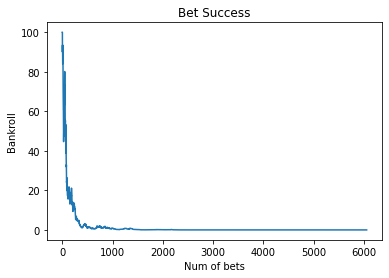

With $100 ended with $5.162686318578501e-09 for profit of -99.99999999483731 or -99.99999999483731% returns. 
 Testing loss = 2.393386125564575


In [ ]:
import matplotlib.pyplot as plt

'''There are two ways to place bets: place the entire allotted bet_size on the bet,
or place the bet size scaled by the model's confidence in the bet. The first strategy
is known as all_in.'''
def test(model, test_inputs, test_labels, test_odds, bankroll, bet_size, all_in=True):
  probs = model.call(test_inputs)
  testing_loss = model.loss(probs, test_labels, test_odds)

  decisions = tf.argmax(probs, 1)
  
  graph_bank = []
  x_ticks = []
  a_bet = 0
  b_bet = 0
  for i in range(len(test_inputs)):
    graph_bank.append(bankroll)
    x_ticks.append(i)
    pre = bankroll
    bet = bankroll * bet_size
    bankroll -= bet
    
    ret = bet
    if(decisions[i] == 0):
      ret = test_labels[i][0] * (1/test_odds[i, 0]) * bet
      a_bet += 1
    elif(decisions[i] == 1):
      ret = (1 - test_labels[i][0]) * (1/test_odds[i, 1]) * bet
      b_bet += 1
    
    bankroll += ret

    if bankroll < 0:
      break
    
  plt.plot(x_ticks , graph_bank)
  plt.title('Bet Success')
  plt.xlabel('Num of bets')
  plt.ylabel('Bankroll')
  plt.show()

  return bankroll, testing_loss

bankroll = 100
bet_size = 0.1
final, tl = test(model, x_test, y_test, test_odds, bankroll, bet_size)

print(f'With ${bankroll} ended with ${final} for profit of {final-bankroll} or {100*(final-bankroll)/bankroll}% returns. \n Testing loss = {tl}')